In [4]:
!pip install pandas altair vega

    100% |████████████████████████████████| 8.9MB 84kB/s 
    100% |████████████████████████████████| 348kB 2.2MB/s 
    100% |████████████████████████████████| 1.5MB 499kB/s 
    100% |████████████████████████████████| 512kB 1.5MB/s 
    100% |████████████████████████████████| 12.2MB 61kB/s 
    100% |████████████████████████████████| 51kB 7.0MB/s 
  Running setup.py bdist_wheel for vega ... done
  Stored in directory: /home/jovyan/.cache/pip/wheels/76/7a/85/a796b8ff2157b97269059083b96d686ec51ef81924035fc227
  Running setup.py bdist_wheel for toolz ... done
  Stored in directory: /home/jovyan/.cache/pip/wheels/f4/0c/f6/ce6b2d1aa459ee97cc3c0f82236302bd62d89c86c700219463
Successfully built vega toolz
You are using pip version 9.0.3, however version 10.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [5]:
import pandas
import altair as alt

In [6]:
flu = pandas.read_csv('flunet2010_11countries.csv', header=1)

In [7]:
flu.head()

,week,Afghanistan,Argentina,Australia,Canada,China,Colombia,Egypt,Germany,Ireland,South Africa,USA
0,1,5.0,4,2,41,2179,36,739,26.0,23,0,366
1,2,13.0,21,1,15,2213,36,396,24.0,8,1,396
2,3,4.0,6,1,8,2228,14,192,18.0,4,0,447
3,4,0.0,1,0,14,2027,11,80,NaN,8,0,402
4,5,0.0,4,1,12,1813,8,56,NaN,4,0,404


In [8]:
alt.Chart(flu).mark_point()

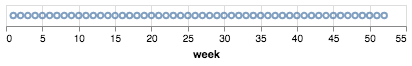

In [9]:
alt.Chart(flu).mark_point().encode(x='week')

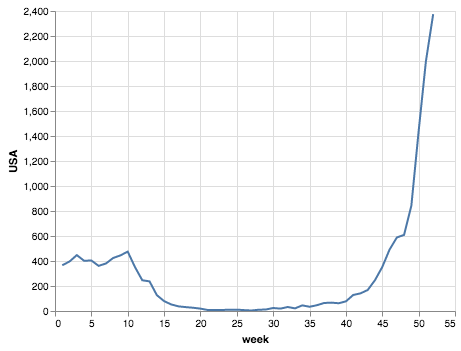

In [10]:
alt.Chart(flu).mark_line().encode(x='week', y='USA')

In [11]:
cols = flu.columns.tolist()
norm = pandas.melt(flu, id_vars=[cols[0]], value_vars=cols[1:], var_name='country')
norm.head()

,week,country,value
0,1,Afghanistan,5.0
1,2,Afghanistan,13.0
2,3,Afghanistan,4.0
3,4,Afghanistan,0.0
4,5,Afghanistan,0.0


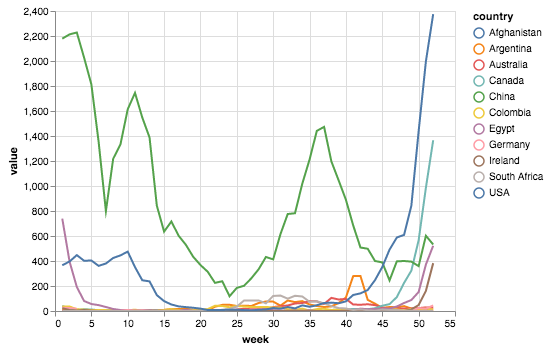

In [12]:
lines = alt.Chart(norm).mark_line().encode(x='week', y='value', color='country')
lines

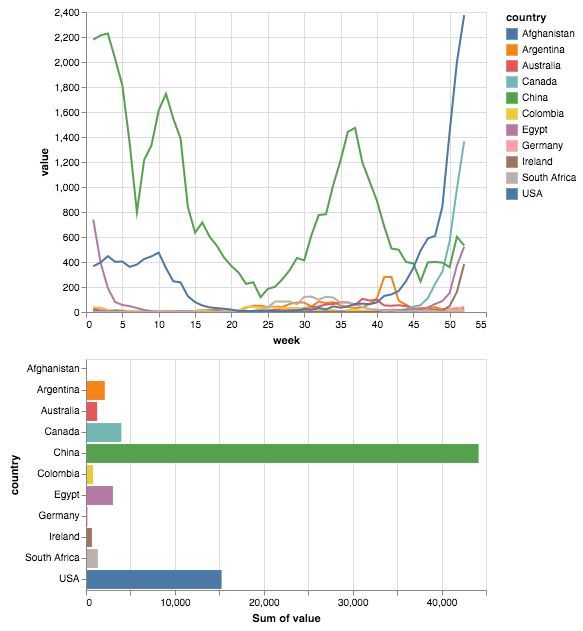

In [13]:
brush = alt.selection_interval(encodings=['x'])

lines = alt.Chart(norm).mark_line().encode(
    x='week', y='value',
    color='country'
).add_selection(brush)

bars = alt.Chart().mark_bar().encode(
    y='country', color='country', x='sum(value)'
).transform_filter(brush)

alt.vconcat(lines, bars, data=norm)

In [37]:
nz = norm.copy()
nz['value'] = nz['value'].map(lambda i: i if i else None)
nz.head()

,week,country,value
0,1,Afghanistan,5.0
1,2,Afghanistan,13.0
2,3,Afghanistan,4.0
3,4,Afghanistan,NaN
4,5,Afghanistan,NaN


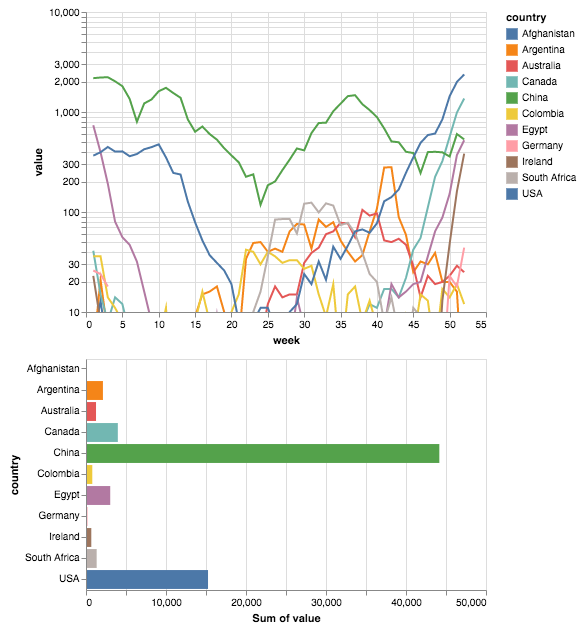

In [45]:
brush = alt.selection_interval(encodings=['x'])

lines = alt.Chart(norm).mark_line(clip=True).encode(
    alt.X('week'),
    alt.Y('value', scale=alt.Scale(type='log', base=10, domain=[10,10000])),
    color='country'
).add_selection(brush)

bars = alt.Chart().mark_bar().encode(
    alt.X('sum(value)', scale=alt.Scale(domain=[0, 50000])),
    alt.Y('country'),
    color='country'
).transform_filter(brush)

alt.vconcat(lines, bars, data=norm)